# Session 3
---
> Working with tabular data

In [1]:
import pandas as pd
import numpy as np # pandas stores array data as Numpy arrays 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme() # sets default seaborn style

- Today we will use seaborn for plotting, but we can reproduce or produce similar figures using purely matplotlib.
- Think of seaborn as an interface to matplotlib.
- As an exercise, try to produce some of these figures using matplotlib w/o seaborn functions.

---
References:
- Seaborn plotting : https://seaborn.pydata.org/tutorial/function_overview.html
- More on seaborn styles: https://seaborn.pydata.org/tutorial/aesthetics.html
- Pandas+Seaborn example code: https://people.duke.edu/~ccc14/sta-663-2017/07_Data.html
---

## Importing and Working with Tabular Data

Pandas comes with a wide variety of IO functions such as `read_csv`, and `read_sql`. Let's use `pandas.read_excel` to import MS Excel data.

---
Pandas References:
- [Pandas importing guide](https://pandas.pydata.org/docs/user_guide/io.html)
- [Indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
---

In [3]:
# if excel is in current directory : "Hara recoil mod.xls"

- `read_excel` assumes the first row is a header

Explore `pd.read_excel`, by running in a cell below
```python
pd.read_excel?
```
 e.g. for file w/o headers you can see that: If file contains no header row, then you should explicitly pass `header=None`.

In [4]:
# pd.read_excel?

In [5]:
df = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',sheet_name='values')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,um/sec,um/sec.1,"Average of ""20 sec slices SUM of myosin intensity""",Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Distance,Unnamed: 26,Unnamed: 27,Unnamed: 28,Orientation,Unnamed: 30,Unnamed: 31,アポトーシス付近か？,Unnamed: 33
0,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
1,140408,10,1,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,0.922346,99.974,90.554,1.104026,1.1-1.5,30.53,30.53,NaN,NaN,Expanding
2,140411,3,1,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.03,...,1.025202,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting
3,NaN,5,NaN,0.019286,0.452162,177590.71,160844.797,144077.821,157699.745,131149.191,...,1.46313,85.606,79.63,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding
4,NaN,6,1,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,1.153178,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,NaN,7,1,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,0.879189,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,NaN,Contracting
173,NaN,8,1,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,0.822534,62.303,45.31,1.375039,1.1-1.5,-112.036,67.964,NaN,NaN,Contracting
174,NaN,NaN,2,0.038526,0.677767,251830.725,255398.925,303768.725,258882.967,235602.642,...,1.065111,62.702,50.922,1.231334,1.1-1.5,70.498,70.498,NaN,NaN,Expanding
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from IPython.display import Markdown
Markdown('![](https://media.giphy.com/media/l4FGGafcOHmrlQxG0/giphy.gif)')

![](https://media.giphy.com/media/l4FGGafcOHmrlQxG0/giphy.gif)

Let's clean it up a little by **removing "footers"** and **setting row 1 as column a header** (indexing starts at 0)

In [7]:
df = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',sheet_name='values', header=[1], skipfooter=2)
df

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
0,140408,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,0.922346,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding
1,140411,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,1.025202,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting
2,NaN,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,1.463130,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding
3,NaN,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,1.153178,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable
4,140415,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,1.165847,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaN,5.0,1.0,-0.041680,0.331127,342312.570,324246.374,349983.413,358232.317,340960.487,...,1.027012,49.168,39.962,1.230369,1.1-1.5,148.299,148.299,NaN,NaN,Contracting
170,NaN,6.0,1.0,-0.047443,0.342908,270851.181,311600.716,261834.724,251960.733,271580.440,...,0.970773,62.273,47.413,1.313416,1.1-1.5,117.646,117.646,NaN,NaN,Contracting
171,NaN,7.0,1.0,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,0.879189,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,NaN,Contracting
172,NaN,8.0,1.0,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,0.822534,62.303,45.310,1.375039,1.1-1.5,-112.036,67.964,NaN,NaN,Contracting


In [8]:
df.loc[118:123,:]

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
118,NaN,6.0,1.0,0.047272,0.888744,306100.776,293465.519,322076.199,262674.241,282093.015,...,1.113875,95.627,85.000,1.125024,1.1-1.5,-118.072,61.928,NaN,NaN,Expanding
119,NaN,NaN,2.0,0.059166,0.196947,267445.895,281360.651,252043.496,248817.700,239361.231,...,0.955494,65.737,60.208,1.091832,1.0-1.1,94.764,94.764,NaN,NaN,Expanding
120,計 n=121 (141105現在ここまでのサンプルで),NaN,3.0,0.016957,1.466160,322412.107,312494.077,308996.024,274530.372,282269.915,...,1.206848,56.329,54.231,1.038686,1.0-1.1,84.710,84.710,NaN,NaN,Expanding
121,141002,1.0,1.0,0.009833,1.275180,378055.756,362791.051,446029.602,313966.052,318101.014,...,1.155849,46.135,45.188,1.020957,1.0-1.1,65.136,65.136,NaN,YES,Rosette
122,NaN,2.0,1.0,-0.009410,1.295310,359427.957,351483.529,339585.094,314959.972,290139.901,...,1.031700,59.396,57.489,1.033172,1.0-1.1,130.061,130.061,NaN,NaN,Stable
123,NaN,NaN,2.0,-0.003403,1.066840,279259.677,293562.219,302972.461,291370.127,256689.141,...,1.138372,85.078,82.000,1.037537,1.0-1.1,-90.000,90.000,NaN,NaN,Stable


In [9]:
Markdown('![](https://media.giphy.com/media/sS8YbjrTzu4KI/giphy.gif)')

![](https://media.giphy.com/media/sS8YbjrTzu4KI/giphy.gif)

Let's use `converters` arg for reading and converting the column "date" to `pandas.Timestamp`—a pandas' version of python `datetime` object.
- Alternatively, we can convert our dates to any numerical type such as `int` or `str` (try it out yourself), but since we are working with dates it is better to explicitly set our "date" column to correct format, since we are assuming they are dates. This will help us spot any mistakes in our code or in MS Excel document early on.

In [10]:
ts = pd.to_datetime('2021Nov26', format="%Y%b%d")
print(ts)

2021-11-26 00:00:00


 - Date formating [link](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [11]:
# lambda function
convert_to_datetime = lambda x: pd.to_datetime(x, format="%y%m%d", errors='coerce')

# same as
def fn_convert_to_datetime(x):
    # python function
    return pd.to_datetime(x,format="%y%m%d",errors='coerce')

In [12]:
df = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',sheet_name='values', header=[1],skipfooter=2,
                   converters={0: convert_to_datetime})
df

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
0,2014-04-08,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,0.922346,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding
1,2014-04-11,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,1.025202,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting
2,NaT,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,1.463130,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding
3,NaT,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,1.153178,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable
4,2014-04-15,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,1.165847,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaT,5.0,1.0,-0.041680,0.331127,342312.570,324246.374,349983.413,358232.317,340960.487,...,1.027012,49.168,39.962,1.230369,1.1-1.5,148.299,148.299,NaN,NaN,Contracting
170,NaT,6.0,1.0,-0.047443,0.342908,270851.181,311600.716,261834.724,251960.733,271580.440,...,0.970773,62.273,47.413,1.313416,1.1-1.5,117.646,117.646,NaN,NaN,Contracting
171,NaT,7.0,1.0,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,0.879189,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,NaN,Contracting
172,NaT,8.0,1.0,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,0.822534,62.303,45.310,1.375039,1.1-1.5,-112.036,67.964,NaN,NaN,Contracting


In [13]:
df.loc[118:123,:]

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
118,NaT,6.0,1.0,0.047272,0.888744,306100.776,293465.519,322076.199,262674.241,282093.015,...,1.113875,95.627,85.000,1.125024,1.1-1.5,-118.072,61.928,NaN,NaN,Expanding
119,NaT,NaN,2.0,0.059166,0.196947,267445.895,281360.651,252043.496,248817.700,239361.231,...,0.955494,65.737,60.208,1.091832,1.0-1.1,94.764,94.764,NaN,NaN,Expanding
120,NaT,NaN,3.0,0.016957,1.466160,322412.107,312494.077,308996.024,274530.372,282269.915,...,1.206848,56.329,54.231,1.038686,1.0-1.1,84.710,84.710,NaN,NaN,Expanding
121,2014-10-02,1.0,1.0,0.009833,1.275180,378055.756,362791.051,446029.602,313966.052,318101.014,...,1.155849,46.135,45.188,1.020957,1.0-1.1,65.136,65.136,NaN,YES,Rosette
122,NaT,2.0,1.0,-0.009410,1.295310,359427.957,351483.529,339585.094,314959.972,290139.901,...,1.031700,59.396,57.489,1.033172,1.0-1.1,130.061,130.061,NaN,NaN,Stable
123,NaT,NaN,2.0,-0.003403,1.066840,279259.677,293562.219,302972.461,291370.127,256689.141,...,1.138372,85.078,82.000,1.037537,1.0-1.1,-90.000,90.000,NaN,NaN,Stable


In [14]:
# df = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',sheet_name='values', header=[1],skipfooter=2,
#                    parse_dates=[0],
#                    converters={0: convert_to_datetime,
#                               1: lambda x: pd.to_numeric(x,errors='coerce')} )
# df

---

## Exploratory Data Analysis using Seaborn
> IBM blog about exploratory data analysis: [link](https://www.ibm.com/cloud/learn/exploratory-data-analysis)

In [15]:
df[df['Rosette??']=='YES'].head(5)

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
32,NaT,NaN,2.0,0.021227,2.60774,469131.335,557022.211,595447.229,397876.034,377834.267,...,1.231894,77.413,75.213,1.029250,1.0-1.1,125.803,125.803,NaN,YES,Rosette
62,NaT,4.0,1.0,-0.015361,4.61008,528204.674,536382.808,559735.592,435588.244,438583.057,...,1.293990,81.500,80.623,1.010878,1.0-1.1,-23.385,156.615,NaN,YES,Rosette
95,2014-07-01,1.0,1.0,-0.011203,1.15713,526370.623,595114.947,398120.448,422961.246,334174.567,...,1.065661,76.005,75.286,1.009550,1.0-1.1,-140.389,39.611,NaN,YES,Rosette
100,NaT,NaN,2.0,-0.000645,1.62574,841454.870,620333.442,621365.194,725918.623,484596.264,...,1.605610,68.631,68.000,1.009279,1.0-1.1,-28.072,151.928,NaN,YES,Rosette
111,2014-09-25,2.0,1.0,0.007387,3.19329,438588.462,299419.100,583712.326,228988.390,228848.113,...,1.989697,27.936,27.857,1.002836,1.0-1.1,-158.962,21.038,NaN,YES,Rosette


In [16]:
# add new series "isros": True/False
df['isros'] = df['Rosette??']=='YES'
df.head()

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
0,2014-04-08,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding,False
1,2014-04-11,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting,False
2,NaT,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding,False
3,NaT,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable,False
4,2014-04-15,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting,False


In [17]:
df[df['isros']].head()

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
32,NaT,NaN,2.0,0.021227,2.60774,469131.335,557022.211,595447.229,397876.034,377834.267,...,77.413,75.213,1.029250,1.0-1.1,125.803,125.803,NaN,YES,Rosette,True
62,NaT,4.0,1.0,-0.015361,4.61008,528204.674,536382.808,559735.592,435588.244,438583.057,...,81.500,80.623,1.010878,1.0-1.1,-23.385,156.615,NaN,YES,Rosette,True
95,2014-07-01,1.0,1.0,-0.011203,1.15713,526370.623,595114.947,398120.448,422961.246,334174.567,...,76.005,75.286,1.009550,1.0-1.1,-140.389,39.611,NaN,YES,Rosette,True
100,NaT,NaN,2.0,-0.000645,1.62574,841454.870,620333.442,621365.194,725918.623,484596.264,...,68.631,68.000,1.009279,1.0-1.1,-28.072,151.928,NaN,YES,Rosette,True
111,2014-09-25,2.0,1.0,0.007387,3.19329,438588.462,299419.100,583712.326,228988.390,228848.113,...,27.936,27.857,1.002836,1.0-1.1,-158.962,21.038,NaN,YES,Rosette,True


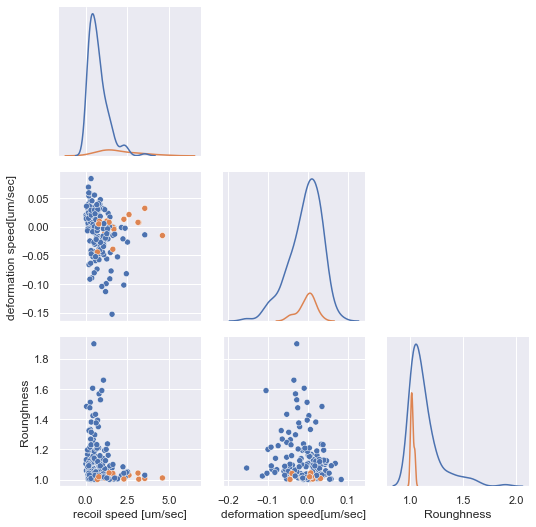

In [18]:
g = sns.PairGrid(df, hue="isros", diag_sharey=False, corner=True,
                vars=["recoil speed [um/sec]", "deformation speed[um/sec]", "Rounghness"])
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.show()

In [19]:
# g = sns.PairGrid(df, hue="Behavior", diag_sharey=False,
#                 vars=["recoil speed [um/sec]", "deformation speed[um/sec]", "Rounghness"])
# g.map_lower(sns.scatterplot)
# g.map_upper(sns.scatterplot)
# g.map_diag(sns.kdeplot)
# plt.show()

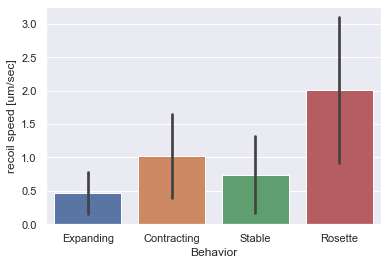

In [20]:
g = sns.barplot(x='Behavior', y="recoil speed [um/sec]", data=df, ci='sd')

> Whiskers and IQR : https://en.wikipedia.org/wiki/Interquartile_range

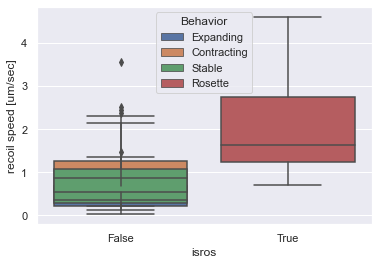

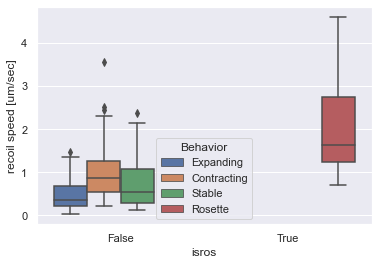

In [21]:
g = sns.boxplot(x='isros', y="recoil speed [um/sec]", hue='Behavior', dodge=False, data=df)
plt.figure()
g = sns.boxplot(x='isros', y="recoil speed [um/sec]", data=df, whis=1.5, hue='Behavior', dodge=True)

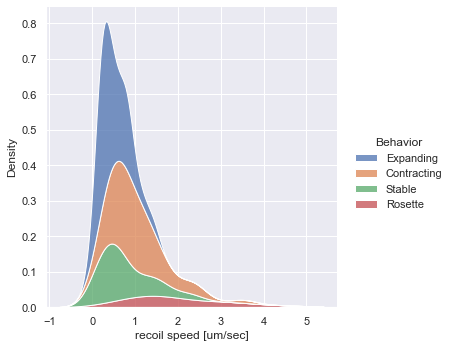

In [22]:
sns.displot(data=df, x="recoil speed [um/sec]", hue='Behavior', multiple="stack", kind="kde");

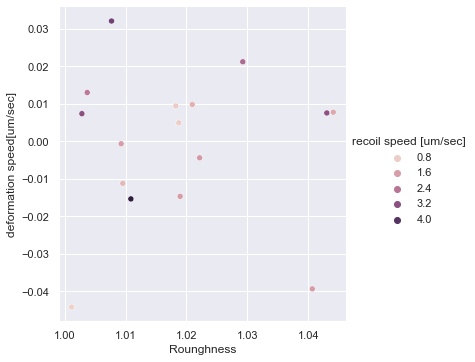

In [23]:
g = sns.relplot(data=df[df['isros']], x="Rounghness", y="deformation speed[um/sec]", hue="recoil speed [um/sec]")

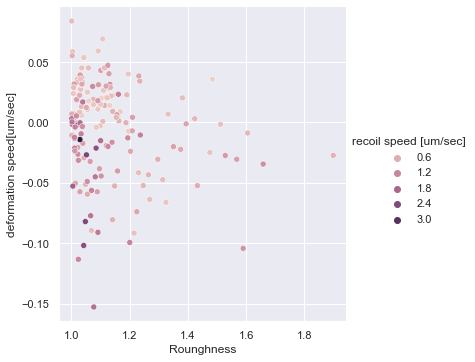

In [24]:
g = sns.relplot(data=df[~df['isros']], x="Rounghness", y="deformation speed[um/sec]", hue="recoil speed [um/sec]")

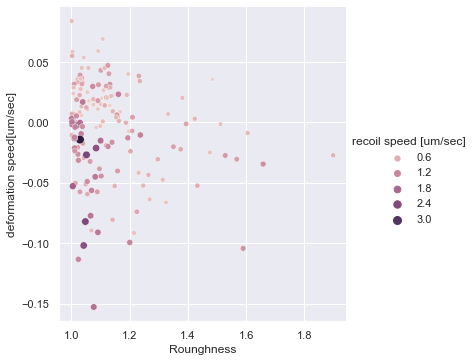

In [25]:
g = sns.relplot(data=df[~df['isros']], x="Rounghness", y="deformation speed[um/sec]", hue="recoil speed [um/sec]", size="recoil speed [um/sec]")

## Filling Missing Values

In [26]:
df.head(10)

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
0,2014-04-08,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding,False
1,2014-04-11,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting,False
2,NaT,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding,False
3,NaT,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable,False
4,2014-04-15,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting,False
5,NaT,2.0,NaN,0.026668,0.205501,233049.334,247119.015,261739.892,193436.594,204313.796,...,91.046,82.000,1.110317,1.1-1.5,90.000,90.000,NaN,NaN,Expanding,False
6,NaT,3.0,NaN,0.022252,0.251946,206398.869,256354.338,229201.626,163502.701,179687.235,...,60.465,53.000,1.140849,1.1-1.5,-148.109,31.891,NaN,NaN,Expanding,False
7,NaT,5.0,NaN,0.027896,0.288298,205672.249,270091.455,245907.089,174059.974,185559.705,...,71.434,69.405,1.029234,1.0-1.1,143.791,143.791,NaN,NaN,Expanding,False
8,NaT,7.0,NaN,0.005141,0.530755,235958.393,287003.905,359991.540,241450.754,188066.088,...,62.996,54.342,1.159251,1.1-1.5,102.758,102.758,NaN,NaN,Stable,False
9,2014-04-29,4.0,1.0,-0.020586,0.709208,319825.148,266389.080,309147.592,254769.185,194680.866,...,48.937,47.885,1.021969,1.0-1.1,151.294,151.294,NaN,NaN,Contracting,False


In [27]:
df.ffill?

Signature: df.ffill(axis=None, inplace: 'bool_t' = False, limit=None, downcast=None) -> 'Optional[FrameOrSeries]'
Docstring:
Synonym for :meth:`DataFrame.fillna` with ``method='ffill'``.

Returns
-------
Series/DataFrame or None
    Object with missing values filled or None if ``inplace=True``.
File:      ~/miniconda/envs/anaconda/lib/python3.8/site-packages/pandas/core/generic.py
Type:      method


- help refers to `DataFrame.fillna with method='ffill'`

In [28]:
pd.DataFrame.fillna?

Signature:
pd.DataFrame.fillna(
    self,
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
) -> 'Optional[DataFrame]'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify an

In [29]:
df.head(4)

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
0,2014-04-08,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding,False
1,2014-04-11,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting,False
2,NaT,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding,False
3,NaT,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable,False


In [30]:
df2 = df.ffill(axis=0)
df2

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
0,2014-04-08,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding,False
1,2014-04-11,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting,False
2,2014-04-11,5.0,1.0,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding,False
3,2014-04-11,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable,False
4,2014-04-15,1.0,1.0,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2014-12-13,5.0,1.0,-0.041680,0.331127,342312.570,324246.374,349983.413,358232.317,340960.487,...,49.168,39.962,1.230369,1.1-1.5,148.299,148.299,NaN,YES,Contracting,False
170,2014-12-13,6.0,1.0,-0.047443,0.342908,270851.181,311600.716,261834.724,251960.733,271580.440,...,62.273,47.413,1.313416,1.1-1.5,117.646,117.646,NaN,YES,Contracting,False
171,2014-12-13,7.0,1.0,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,YES,Contracting,False
172,2014-12-13,8.0,1.0,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,62.303,45.310,1.375039,1.1-1.5,-112.036,67.964,NaN,YES,Contracting,False


***Note that now we have overwritten `Rosette??` column*** !


Let's convert "sample" and "cell" values to integers

In [31]:
# convert values in cols ['sample#','cell#'] to integers:
df2[['sample#','cell#']] = df2[['sample#','cell#']].apply(np.int64)

df2.head()

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
0,2014-04-08,10,1,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding,False
1,2014-04-11,3,1,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting,False
2,2014-04-11,5,1,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding,False
3,2014-04-11,6,1,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable,False
4,2014-04-15,1,1,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting,False


### Multi-column indexing
> https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

Let's our index dataframe `df2` using columns `['date', 'sample#', 'cell#']`

In [32]:
df2.reindex(index=df2[['date', 'sample#', 'cell#']]).head()

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior,isros
"(2014-04-08 00:00:00, 10, 1)",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2014-04-11 00:00:00, 3, 1)",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2014-04-11 00:00:00, 5, 1)",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2014-04-11 00:00:00, 6, 1)",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2014-04-15 00:00:00, 1, 1)",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
Markdown('![](https://media.giphy.com/media/13ywPzPJdfhmBG/giphy.gif)')

![](https://media.giphy.com/media/13ywPzPJdfhmBG/giphy.gif)

- Use reindexing when you add/remove rows (at least one of the uses), here **we want to set a new index to existing rows** ( we need to use `set_index()`)

In [34]:
df2.set_index(['date', 'sample#', 'cell#'], drop=True, inplace=True)
df2

deformation speed[um/sec]  recoil speed [um/sec]  \
date       sample# cell#                                                     
2014-04-08 10      1                       0.020217               0.023877   
2014-04-11 3       1                      -0.043337               0.464255   
           5       1                       0.019286               0.452162   
           6       1                       0.006938               0.283717   
2014-04-15 1       1                      -0.052628               0.524569   
...                                             ...                    ...   
2014-12-13 5       1                      -0.041680               0.331127   
           6       1                      -0.047443               0.342908   
           7       1                      -0.052361               0.599994   
           8       1                      -0.022246               0.638493   
                   2                       0.038526               0.677767   

                          ablated boundary[A]  side boundaries1[B]  \
date       sample# cell#                                             
2014-04-08 10      1               232282.108           227617.434   
2014-04-11 3       1               192264.977           170854.714   
           5       1               177590.710           160844.797   
           6       1               144190.642           155999.894   
2014-04-15 1       1               218559.892           284244.022   
...                                       ...                  ...   
2014-12-13 5       1               342312.570           324246.374   
           6       1               270851.181           311600.716   
           7       1               286922.025           276689.076   
           8       1               253561.268           232911.064   
                   2               251830.725           255398.925   

                          side boundaries2[C]  lateral mesh1[D]  \
date       sample# cell#                                          
2014-04-08 10      1               291590.094        193478.326   
2014-04-11 3       1               204113.139        153200.523   
           5       1               144077.821        157699.745   
           6       1               146060.149        148492.638   
2014-04-15 1       1               233324.054        240404.462   
...                                       ...               ...   
2014-12-13 5       1               349983.413        358232.317   
           6       1               261834.724        251960.733   
           7       1               288493.637        349425.503   
           8       1               239602.088        263550.028   
                   2               303768.725        258882.967   

                          lateral mesh2[E]  node-side mesh1[F]  \
date       sample# cell#                                         
2014-04-08 10      1            195597.415          192020.219   
2014-04-11 3       1            179752.030          143337.849   
           5       1            131149.191          161861.082   
           6       1            141348.921          163676.455   
2014-04-15 1       1            222680.872          217472.026   
...                                    ...                 ...   
2014-12-13 5       1            340960.487          290946.593   
           6       1            271580.440          274096.143   
           7       1            367075.189          244607.679   
           8       1            226892.507          228048.056   
                   2            235602.642          263572.549   

                          node-side mesh2[G]  background value[H]  ...  \
date       sample# cell#                                           ...   
2014-04-08 10      1              174311.912           198587.187  ...   
2014-04-11 3       1              144448.000           140355.696  ...   
           5       1              185414.505           118675.544  ...   

Let's select samples from '2014-12-13'

In [35]:
df2.index[0]

(Timestamp('2014-04-08 00:00:00'), 10, 1)

In [36]:
df2.loc['2014-12-13']

deformation speed[um/sec]  recoil speed [um/sec]  \
date       sample# cell#                                                     
2014-12-13 2       1                      -0.057402               0.806116   
                   2                      -0.012269               1.276030   
           3       1                      -0.001159               0.720956   
                   2                       0.004934               0.794658   
           4       1                      -0.034461               1.076600   
                   2                      -0.027366               0.897812   
           5       1                      -0.041680               0.331127   
           6       1                      -0.047443               0.342908   
           7       1                      -0.052361               0.599994   
           8       1                      -0.022246               0.638493   
                   2                       0.038526               0.677767   

                          ablated boundary[A]  side boundaries1[B]  \
date       sample# cell#                                             
2014-12-13 2       1               291608.108           304680.812   
                   2               369241.783           369114.896   
           3       1               249232.251           264846.628   
                   2               359927.666           387119.252   
           4       1               289239.914           296122.704   
                   2               234851.706           270351.533   
           5       1               342312.570           324246.374   
           6       1               270851.181           311600.716   
           7       1               286922.025           276689.076   
           8       1               253561.268           232911.064   
                   2               251830.725           255398.925   

                          side boundaries2[C]  lateral mesh1[D]  \
date       sample# cell#                                          
2014-12-13 2       1               314063.685        302611.891   
                   2               384428.031        322836.857   
           3       1               249075.420        233079.440   
                   2               465820.543        310027.280   
           4       1               278473.249        382362.012   
                   2               277252.754        257817.585   
           5       1               349983.413        358232.317   
           6       1               261834.724        251960.733   
           7       1               288493.637        349425.503   
           8       1               239602.088        263550.028   
                   2               303768.725        258882.967   

                          lateral mesh2[E]  node-side mesh1[F]  \
date       sample# cell#                                         
2014-12-13 2       1            308844.269          256867.276   
                   2            402087.532          311359.377   
           3       1            244157.208          268871.840   
                   2            228488.471          342323.860   
           4       1            259773.106          274064.062   
                   2            234987.020          272516.672   
           5       1            340960.487          290946.593   
           6       1            271580.440          274096.143   
           7       1            367075.189          244607.679   
           8       1            226892.507          228048.056   
                   2            235602.642          263572.549   

                          node-side mesh2[G]  background value[H]  ...  \
date       sample# cell#                                           ...   
2014-12-13 2       1              309895.574           303125.873  ...   
                   2              404840.000           291184.000  ...   
           3       1              240761.491           253240.861  ...   

What happens if we use datetime object to access the same index?

In [37]:
# using datetime returns all columns except the "date"
df2.loc[pd.to_datetime('2014-12-13')]

deformation speed[um/sec]  recoil speed [um/sec]  \
sample# cell#                                                     
2       1                      -0.057402               0.806116   
        2                      -0.012269               1.276030   
3       1                      -0.001159               0.720956   
        2                       0.004934               0.794658   
4       1                      -0.034461               1.076600   
        2                      -0.027366               0.897812   
5       1                      -0.041680               0.331127   
6       1                      -0.047443               0.342908   
7       1                      -0.052361               0.599994   
8       1                      -0.022246               0.638493   
        2                       0.038526               0.677767   

               ablated boundary[A]  side boundaries1[B]  side boundaries2[C]  \
sample# cell#                                                                  
2       1               291608.108           304680.812           314063.685   
        2               369241.783           369114.896           384428.031   
3       1               249232.251           264846.628           249075.420   
        2               359927.666           387119.252           465820.543   
4       1               289239.914           296122.704           278473.249   
        2               234851.706           270351.533           277252.754   
5       1               342312.570           324246.374           349983.413   
6       1               270851.181           311600.716           261834.724   
7       1               286922.025           276689.076           288493.637   
8       1               253561.268           232911.064           239602.088   
        2               251830.725           255398.925           303768.725   

               lateral mesh1[D]  lateral mesh2[E]  node-side mesh1[F]  \
sample# cell#                                                           
2       1            302611.891        308844.269          256867.276   
        2            322836.857        402087.532          311359.377   
3       1            233079.440        244157.208          268871.840   
        2            310027.280        228488.471          342323.860   
4       1            382362.012        259773.106          274064.062   
        2            257817.585        234987.020          272516.672   
5       1            358232.317        340960.487          290946.593   
6       1            251960.733        271580.440          274096.143   
7       1            349425.503        367075.189          244607.679   
8       1            263550.028        226892.507          228048.056   
        2            258882.967        235602.642          263572.549   

               node-side mesh2[G]  background value[H]  ...   Along  \
sample# cell#                                           ...           
2       1              309895.574           303125.873  ...  62.729   
        2              404840.000           291184.000  ...  48.664   
3       1              240761.491           253240.861  ...  79.438   
        2              466550.588           266514.785  ...  63.800   
4       1              246206.686           239355.139  ...  53.090   
        2              266050.770           234903.392  ...  88.995   
5       1              272813.507           274466.228  ...  49.168   
6       1              243681.771           266683.443  ...  62.273   
7       1              287948.631           302867.848  ...  64.061   
8       1              221002.698           272968.051  ...  62.303   
        2              269070.977           250041.266  ...  62.702   

               Start-End  Rounghness       Rn  Original  Normalize  Judge  \
sample# cell#                                                               
2       1         60.959    1.029036  1.0-1.1   138.991    138.991    NaN 

For *consistency* use `DataFrame.index.get_loc()` for indexing and slicing dataframes:

In [38]:
df2[df2.index.get_loc('2014-12-13')]

deformation speed[um/sec]  recoil speed [um/sec]  \
date       sample# cell#                                                     
2014-12-13 2       1                      -0.057402               0.806116   
                   2                      -0.012269               1.276030   
           3       1                      -0.001159               0.720956   
                   2                       0.004934               0.794658   
           4       1                      -0.034461               1.076600   
                   2                      -0.027366               0.897812   
           5       1                      -0.041680               0.331127   
           6       1                      -0.047443               0.342908   
           7       1                      -0.052361               0.599994   
           8       1                      -0.022246               0.638493   
                   2                       0.038526               0.677767   

                          ablated boundary[A]  side boundaries1[B]  \
date       sample# cell#                                             
2014-12-13 2       1               291608.108           304680.812   
                   2               369241.783           369114.896   
           3       1               249232.251           264846.628   
                   2               359927.666           387119.252   
           4       1               289239.914           296122.704   
                   2               234851.706           270351.533   
           5       1               342312.570           324246.374   
           6       1               270851.181           311600.716   
           7       1               286922.025           276689.076   
           8       1               253561.268           232911.064   
                   2               251830.725           255398.925   

                          side boundaries2[C]  lateral mesh1[D]  \
date       sample# cell#                                          
2014-12-13 2       1               314063.685        302611.891   
                   2               384428.031        322836.857   
           3       1               249075.420        233079.440   
                   2               465820.543        310027.280   
           4       1               278473.249        382362.012   
                   2               277252.754        257817.585   
           5       1               349983.413        358232.317   
           6       1               261834.724        251960.733   
           7       1               288493.637        349425.503   
           8       1               239602.088        263550.028   
                   2               303768.725        258882.967   

                          lateral mesh2[E]  node-side mesh1[F]  \
date       sample# cell#                                         
2014-12-13 2       1            308844.269          256867.276   
                   2            402087.532          311359.377   
           3       1            244157.208          268871.840   
                   2            228488.471          342323.860   
           4       1            259773.106          274064.062   
                   2            234987.020          272516.672   
           5       1            340960.487          290946.593   
           6       1            271580.440          274096.143   
           7       1            367075.189          244607.679   
           8       1            226892.507          228048.056   
                   2            235602.642          263572.549   

                          node-side mesh2[G]  background value[H]  ...  \
date       sample# cell#                                           ...   
2014-12-13 2       1              309895.574           303125.873  ...   
                   2              404840.000           291184.000  ...   
           3       1              240761.491           253240.861  ...   

In [39]:
df2[df2.index.get_loc(pd.to_datetime('2014-12-13'))]

deformation speed[um/sec]  recoil speed [um/sec]  \
date       sample# cell#                                                     
2014-12-13 2       1                      -0.057402               0.806116   
                   2                      -0.012269               1.276030   
           3       1                      -0.001159               0.720956   
                   2                       0.004934               0.794658   
           4       1                      -0.034461               1.076600   
                   2                      -0.027366               0.897812   
           5       1                      -0.041680               0.331127   
           6       1                      -0.047443               0.342908   
           7       1                      -0.052361               0.599994   
           8       1                      -0.022246               0.638493   
                   2                       0.038526               0.677767   

                          ablated boundary[A]  side boundaries1[B]  \
date       sample# cell#                                             
2014-12-13 2       1               291608.108           304680.812   
                   2               369241.783           369114.896   
           3       1               249232.251           264846.628   
                   2               359927.666           387119.252   
           4       1               289239.914           296122.704   
                   2               234851.706           270351.533   
           5       1               342312.570           324246.374   
           6       1               270851.181           311600.716   
           7       1               286922.025           276689.076   
           8       1               253561.268           232911.064   
                   2               251830.725           255398.925   

                          side boundaries2[C]  lateral mesh1[D]  \
date       sample# cell#                                          
2014-12-13 2       1               314063.685        302611.891   
                   2               384428.031        322836.857   
           3       1               249075.420        233079.440   
                   2               465820.543        310027.280   
           4       1               278473.249        382362.012   
                   2               277252.754        257817.585   
           5       1               349983.413        358232.317   
           6       1               261834.724        251960.733   
           7       1               288493.637        349425.503   
           8       1               239602.088        263550.028   
                   2               303768.725        258882.967   

                          lateral mesh2[E]  node-side mesh1[F]  \
date       sample# cell#                                         
2014-12-13 2       1            308844.269          256867.276   
                   2            402087.532          311359.377   
           3       1            244157.208          268871.840   
                   2            228488.471          342323.860   
           4       1            259773.106          274064.062   
                   2            234987.020          272516.672   
           5       1            340960.487          290946.593   
           6       1            271580.440          274096.143   
           7       1            367075.189          244607.679   
           8       1            226892.507          228048.056   
                   2            235602.642          263572.549   

                          node-side mesh2[G]  background value[H]  ...  \
date       sample# cell#                                           ...   
2014-12-13 2       1              309895.574           303125.873  ...   
                   2              404840.000           291184.000  ...   
           3       1              240761.491           253240.861  ...   

In [40]:
df2.loc[('2014-12-13', 4, 2)] # use label indices

deformation speed[um/sec]                              -0.027366
recoil speed [um/sec]                                   0.897812
ablated boundary[A]                                   234851.706
side boundaries1[B]                                   270351.533
side boundaries2[C]                                   277252.754
lateral mesh1[D]                                      257817.585
lateral mesh2[E]                                       234987.02
node-side mesh1[F]                                    272516.672
node-side mesh2[G]                                     266050.77
background value[H]                                   234903.392
Around Ablation[A+D+E]                                727656.311
Neiborghs [Ave(B,C)+F+G]                             812369.5855
Ratio of I/II                                           0.895721
Ratio of medial                                         0.915029
Background Factor[(Ave(A,D,E)/H)+(Ave(B,C,F,G)/H]       2.188538
Ratio of junctional      

In [41]:
print('Row:',df2.index.get_loc(('2014-12-13', 4, 2)),'\n')
df2.iloc[df2.index.get_loc(('2014-12-13', 4, 2))] # use df2.index.get_loc to find row index

Row: 168 



deformation speed[um/sec]                              -0.027366
recoil speed [um/sec]                                   0.897812
ablated boundary[A]                                   234851.706
side boundaries1[B]                                   270351.533
side boundaries2[C]                                   277252.754
lateral mesh1[D]                                      257817.585
lateral mesh2[E]                                       234987.02
node-side mesh1[F]                                    272516.672
node-side mesh2[G]                                     266050.77
background value[H]                                   234903.392
Around Ablation[A+D+E]                                727656.311
Neiborghs [Ave(B,C)+F+G]                             812369.5855
Ratio of I/II                                           0.895721
Ratio of medial                                         0.915029
Background Factor[(Ave(A,D,E)/H)+(Ave(B,C,F,G)/H]       2.188538
Ratio of junctional      

In [42]:
Markdown("![](https://media.giphy.com/media/DffShiJ47fPqM/giphy.gif)")

![](https://media.giphy.com/media/DffShiJ47fPqM/giphy.gif)

### Setting Index or Multi-indexing During Importing

You can set multi-index and more during importing. Try exploring `pd.read_excel` using
```python
pd.read_excel?
```

In [43]:
df_indexed = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',
                           sheet_name='values', header=[1], skipfooter=2,
                           converters={0: lambda x: pd.to_datetime(x, format="%y%m%d", errors='coerce')},
                           index_col = [0,1,2]
                          )

df_indexed

deformation speed[um/sec]  recoil speed [um/sec]  \
date   sample# cell#                                                     
140408 10      1                       0.020217               0.023877   
140411 3       1                      -0.043337               0.464255   
       5       1                       0.019286               0.452162   
       6       1                       0.006938               0.283717   
140415 1       1                      -0.052628               0.524569   
...                                         ...                    ...   
141213 5       1                      -0.041680               0.331127   
       6       1                      -0.047443               0.342908   
       7       1                      -0.052361               0.599994   
       8       1                      -0.022246               0.638493   
               2                       0.038526               0.677767   

                      ablated boundary[A]  side boundaries1[B]  \
date   sample# cell#                                             
140408 10      1               232282.108           227617.434   
140411 3       1               192264.977           170854.714   
       5       1               177590.710           160844.797   
       6       1               144190.642           155999.894   
140415 1       1               218559.892           284244.022   
...                                   ...                  ...   
141213 5       1               342312.570           324246.374   
       6       1               270851.181           311600.716   
       7       1               286922.025           276689.076   
       8       1               253561.268           232911.064   
               2               251830.725           255398.925   

                      side boundaries2[C]  lateral mesh1[D]  lateral mesh2[E]  \
date   sample# cell#                                                            
140408 10      1               291590.094        193478.326        195597.415   
140411 3       1               204113.139        153200.523        179752.030   
       5       1               144077.821        157699.745        131149.191   
       6       1               146060.149        148492.638        141348.921   
140415 1       1               233324.054        240404.462        222680.872   
...                                   ...               ...               ...   
141213 5       1               349983.413        358232.317        340960.487   
       6       1               261834.724        251960.733        271580.440   
       7       1               288493.637        349425.503        367075.189   
       8       1               239602.088        263550.028        226892.507   
               2               303768.725        258882.967        235602.642   

                      node-side mesh1[F]  node-side mesh2[G]  \
date   sample# cell#                                           
140408 10      1              192020.219          174311.912   
140411 3       1              143337.849          144448.000   
       5       1              161861.082          185414.505   
       6       1              163676.455          118254.698   
140415 1       1              217472.026          184755.425   
...                                  ...                 ...   
141213 5       1              290946.593          272813.507   
       6       1              274096.143          243681.771   
       7       1              244607.679          287948.631   
       8       1              228048.056          221002.698   
               2              263572.549          269070.977   

                      background value[H]  ...  MyoIntMedNei   Along  \
date   sample# cell#                       ...                         
140408 10      1               198587.187  ...      0.922346  99.974   
140411 3       1               140355.696  ...      1.025202  71.251   
       5       1         

When we set `index_col`, `converters` arg is not doing anything to the data, and we are **not filtering our dates**.
- `converters={0: lambda x: pd.to_datetime(x, format="%y%m%d", errors='coerce')}` is ignored.
- **if your excell had comment cells** you might still have to clean up your data

***Always check your data !***

In [44]:
df_indexed.iloc[118:123]

deformation speed[um/sec]  \
date                         sample# cell#                              
140925                       6       1                       0.047272   
                                     2                       0.059166   
計 n=121 (141105現在ここまでのサンプルで) 6       3                       0.016957   
141002                       1       1                       0.009833   
                             2       1                      -0.009410   

                                            recoil speed [um/sec]  \
date                         sample# cell#                          
140925                       6       1                   0.888744   
                                     2                   0.196947   
計 n=121 (141105現在ここまでのサンプルで) 6       3                   1.466160   
141002                       1       1                   1.275180   
                             2       1                   1.295310   

                                            ablated boundary[A]  \
date                         sample# cell#                        
140925                       6       1               306100.776   
                                     2               267445.895   
計 n=121 (141105現在ここまでのサンプルで) 6       3               322412.107   
141002                       1       1               378055.756   
                             2       1               359427.957   

                                            side boundaries1[B]  \
date                         sample# cell#                        
140925                       6       1               293465.519   
                                     2               281360.651   
計 n=121 (141105現在ここまでのサンプルで) 6       3               312494.077   
141002                       1       1               362791.051   
                             2       1               351483.529   

                                            side boundaries2[C]  \
date                         sample# cell#                        
140925                       6       1               322076.199   
                                     2               252043.496   
計 n=121 (141105現在ここまでのサンプルで) 6       3               308996.024   
141002                       1       1               446029.602   
                             2       1               339585.094   

                                            lateral mesh1[D]  \
date                         sample# cell#                     
140925                       6       1            262674.241   
                                     2            248817.700   
計 n=121 (141105現在ここまでのサンプルで) 6       3            274530.372   
141002                       1       1            313966.052   
                             2       1            314959.972   

                                            lateral mesh2[E]  \
date                         sample# cell#                     
140925                       6       1            282093.015   
                                     2            239361.231   
計 n=121 (141105現在ここまでのサンプルで) 6       3            282269.915   
141002                       1       1            318101.014   
                             2       1            290139.901   

                                            node-side mesh1[F]  \
date                         sample# cell#                       
140925                       6       1              294365.346   
                                     2              247375.962   
計 n=121 (141105現在ここまでのサンプルで) 6       3              311890.251   
141002                       1       1              312982.259   
                             2       1              302312.627   

                                            node-side mesh2[G]  \
date                         sample# cell#                       
140925                       6       1              262205.485   
                                     2              234176.829   
計 n=121 (1411

Accessing rows using `df.loc()`:

In [45]:
df_indexed.loc[(140925, 6, 1)]

deformation speed[um/sec]                              0.047272
recoil speed [um/sec]                                  0.888744
ablated boundary[A]                                  306100.776
side boundaries1[B]                                  293465.519
side boundaries2[C]                                  322076.199
lateral mesh1[D]                                     262674.241
lateral mesh2[E]                                     282093.015
node-side mesh1[F]                                   294365.346
node-side mesh2[G]                                   262205.485
background value[H]                                  249835.494
Around Ablation[A+D+E]                               850868.032
Neiborghs [Ave(B,C)+F+G]                              864341.69
Ratio of I/II                                          0.984412
Ratio of medial                                        0.978792
Background Factor[(Ave(A,D,E)/H)+(Ave(B,C,F,G)/H]      2.308122
Ratio of junctional                     

## Matplotlib

You can directly use `matplotlib` to plot and explore your data

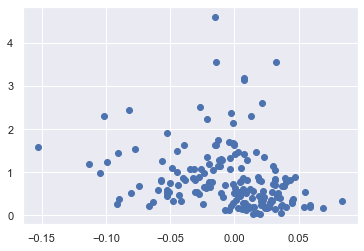

In [46]:
plt.plot(df2['deformation speed[um/sec]'], df2['recoil speed [um/sec]'],'o')